## Aplicando os conjuntos de treino, teste e validação em uma CNN

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Definir tamanho da imagem e número de classes
img_width, img_height = 128, 128
num_classes = 2

# Definir diretórios de treino e validação
train_data_dir = 'C:/Users/Alan Mathias/projeto_mosquito_V2/dataset_split/train' 
validation_data_dir = 'C:/Users/Alan Mathias/projeto_mosquito_V2/dataset_split/val'
test_data_dir = 'C:/Users/Alan Mathias/projeto_mosquito_V2/dataset_split/test'


# Criar gerador de dados para treino com aumento de dados
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Criar gerador de dados para validação sem aumento de dados
validation_datagen = ImageDataGenerator(rescale=1./255)
# Criar gerador de dados para teste sem aumento de dados
test_datagen = ImageDataGenerator(rescale=1./255)
# Criar gerador de dados para treino
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    color_mode='grayscale',
                                                    batch_size=32,
                                                    class_mode='binary')

# Criar gerador de dados para validação
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                              target_size=(img_width, img_height),
                                                              color_mode='grayscale',
                                                              batch_size=32,
                                                              class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=32,
                                                    color_mode='grayscale',
                                                    class_mode='binary')



Found 5928 images belonging to 2 classes.
Found 741 images belonging to 2 classes.
Found 742 images belonging to 2 classes.


### A classe Aedes Aegypti = 0
### A classe Anopholes Gambiae = 1

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar modelo
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 64)                8128576   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,128,961
Trainable params: 8,128,961
Non-trainable params: 0
______________________________________________

## Verificar as predições do modelo com 10 elementos de teste:


In [6]:
from sklearn.metrics import accuracy_score
import numpy as np

# Carregar os primeiros 10 dados de teste
x_test, y_test = next(test_generator)
x_test, y_test = x_test[:20], y_test[:20]

# Fazer as predições do modelo
y_pred = model.predict(x_test)

# Arredondar as predições para 0 ou 1
y_pred = np.round(y_pred)

# Comparar as predições com as classes reais
print("Classes reais: ", y_test)
print("Predições do modelo: ", y_pred)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}%".format(accuracy * 100))


1/1 [==============================] - 0s 96ms/step
Classes reais:  [0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
Predições do modelo:  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]]
Acurácia: 100.00%


24/24 [==============================] - 3s 126ms/step
tf.Tensor(
[[195 179]
 [179 189]], shape=(2, 2), dtype=int32)


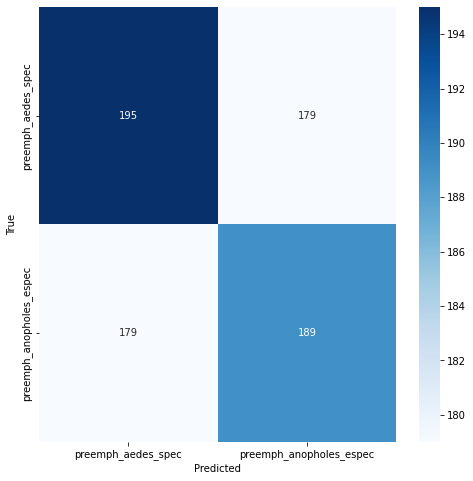

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obter as classes previstas do conjunto de teste
predicted_classes = (model.predict(test_generator) > 0.5).astype("int32")

# Obter as classes reais do conjunto de teste
true_classes = test_generator.classes

# Obter os nomes das classes
class_names = list(test_generator.class_indices.keys())

# Calcular a matriz de confusão
cm = tf.math.confusion_matrix(true_classes, predicted_classes)

# Imprimir a matriz de confusão
print(cm)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
model.save('modelos/1_modelo_cnn_128x128.h5')
